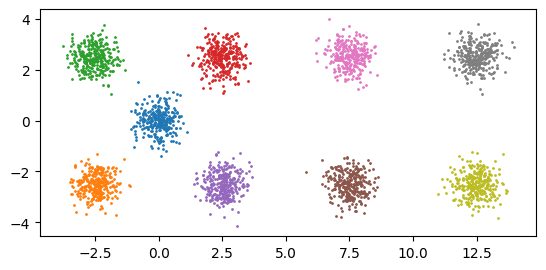

In [88]:
import collections
import itertools
from typing import Iterable

import jscatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def plot(a, b=None):

    if b is None:
        plt.gca().set_aspect("equal")
        for (_, grp), color in zip(a.groupby("label"), jscatter.glasbey_dark):
            plt.scatter(grp.x, grp.y, s=1)
    else:
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)  # figsize=(12, 3))
        ax0.set_aspect("equal")
        ax1.set_aspect("equal")

        for (_, grp), color in zip(a.groupby("label"), jscatter.glasbey_dark):
            ax0.scatter(grp.x, grp.y, s=1)

        for (_, grp), color in zip(b.groupby("label"), jscatter.glasbey_dark):
            ax1.scatter(grp.x, grp.y, s=1)


def dataframe(generate_pts, labels: Iterable[str] = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    """Collects sequence of X into a labeled pd.DataFrame"""

    def wrapper(*args, **kwargs):
        dfs = []
        for label, result in zip(labels, generate_pts(*args, **kwargs)):
            if isinstance(result, tuple):
                label, X = result
            else:
                X = result

            dfs.append(pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=label)))

        df = pd.concat(dfs)
        df.label = df.label.astype("category")
        return df

    return wrapper


Covariance2D = tuple[tuple[float, float], tuple[float, float]]


@dataframe
def base(
    neighborhood_offset: float = 10,
    x: float = 2.5,
    cov: Covariance2D = ((0.2, 0), (0, 0.2)),
    size: int = 300,
):
    for mean in (
        (0, 0),
        (-x, -x),
        (-x, x),
        (x, x),
        (x, -x),
        (neighborhood_offset - x, -x),
        (neighborhood_offset - x, x),
        (neighborhood_offset + x, x),
        (neighborhood_offset + x, -x),
    ):
        yield np.random.multivariate_normal(mean, cov, size)


def translate(data, labels: list[str], offset: tuple[float, float] = (10, 0)):
    copy = data.copy()
    copy.loc[copy["label"].isin(labels), ["x", "y"]] += offset
    return copy


def rotate(data, labels: list[str], theta: float = np.radians(-45)):
    copy = data.copy()
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    mask = copy["label"].isin(labels)
    copy.loc[mask, ["x", "y"]] = copy.loc[mask, ["x", "y"]].values @ R.T

    return copy


data = base()

plot(data)

### Case 1: Displacement

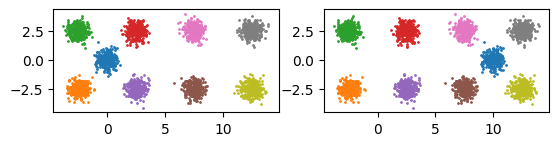

In [89]:
plot(data, translate(data, labels=["A"]))

### Case 2: Local rotation

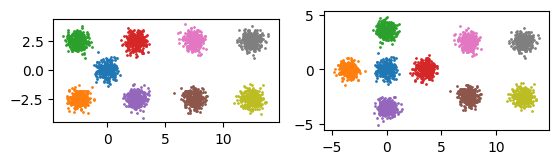

In [90]:
plot(data, rotate(data, labels=["B", "C", "D", "E"]))

### Case 3: Global rotation

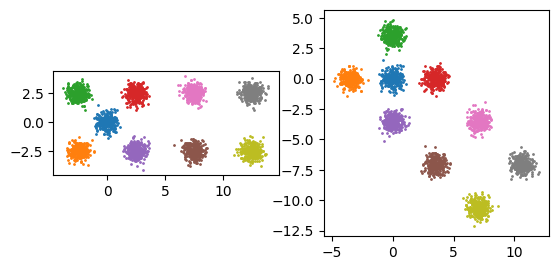

In [91]:
plot(data, rotate(data, labels=["B", "C", "D", "E", "F", "G", "H", "I"]))

### Case 4: Composition change

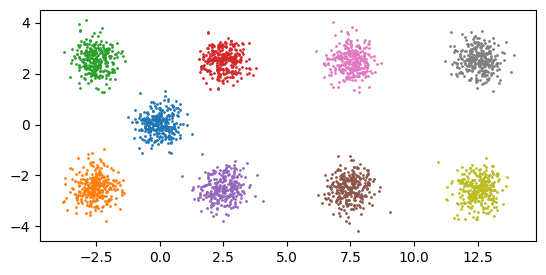

In [92]:
@dataframe
def case4(
    neighborhood_offset: float = 10,
    x: float = 2.5,
    cov: Covariance2D = ((0.2, 0), (0, 0.2)),
    size: int = 300,
):
    for mean in (
        (0, 0),
        (-x, -x),
        (-x, x),
        (x, x),
        (x, -x),
        (neighborhood_offset - x, -x),
        (neighborhood_offset - x, x),
        (neighborhood_offset + x, x),
        (neighborhood_offset + x, -x),
    ):
        yield np.random.multivariate_normal(mean, cov, size)
        
        
plot(case4())

In [ ]:
# size differences

# test removing groups

# add some confusion examples